# Homework 3 Part 1 - Solutions

This is an individual assignment.

---

Write your answers using markdown cells or embed handwritten answers with ```IPython.display.Image```.

---

# Exercise 1 (8 points)

**Consider a binary classification task where each sample $\mathbf{x}_i$ is $d$-dimensional with its corresponding label $t_i\in\{0,1\}$. Suppose you have a dataset of $N$ i.i.d. samples, $\{(x_i,t_i)\}_{i=1}^N$. Let $\mathbf{m}_i$ be the sample average for class $C_i$, $\mathbf{m}_i\in\mathbb{R}^d$.**

**The goal is to train a discriminant function of the form**

$$y(\mathbf{x})=\mathbf{w}^T\mathbf{x}+w_0$$ 

**to separate the two classes. Recall that the vector $\mathbf{w}$ is orthogonal to the discriminant function $y(\mathbf{x}$ and that we are only interested in its direction not magnitude, thus the solution for $\mathbf{w}$ must satisfy the (equality) constraint $\mathbf{w}^T\mathbf{w}=1$. Answer the following questions:**

**Suppose that you are interested in finding $\mathbf{w}$ and $w_0$ such that the projected class means are the most separable. Write down the objective function, the Lagrangian function, and derive for the analytical solutions for $\mathbf{w}$ and $w_0$.**

The objective function can be written as:

\begin{align*}
J(\mathbf{w}) &= \mathbf{w}^T(\mathbf{m}_1-\mathbf{m}_2)^T(\mathbf{m}_1-\mathbf{m}_2)\mathbf{w} = \mathbf{w}^T S_B \mathbf{w}
\end{align*}

where $S_B = (\mathbf{m}_1-\mathbf{m}_2)^T(\mathbf{m}_1-\mathbf{m}_2)$. The optimization problem is posed as,

\begin{align*}
\arg_{\mathbf{w}} \max \;\; & \mathbf{w}^TS_B\mathbf{w} \\
\text{subject to} & \;\; \mathbf{w}^T\mathbf{w}=1
\end{align*}

The Lagrangian function is:

\begin{align*}
\mathcal{L} = \mathbf{w}^TS_B\mathbf{w} + \lambda (1 - \mathbf{w}^T\mathbf{w})
\end{align*}

Deriving for $\mathbf{w}$:

\begin{align*}
\frac{\partial\mathcal{L}}{\partial\mathbf{w}} = 0 \iff S_B\mathbf{w} = \lambda\mathbf{w}
\end{align*}

Thus the solution for $\mathbf{w}$ is the eigenvector of $S_B$ with the **largest** eigenvalue. Lastly, the solution for $w_0$ is $\frac{(\mathbf{m}_1-\mathbf{m}_2)^T\mathbf{w}}{2}$.

---

# Exercise 2 (8 points)

**Consider a multi-class Logistic Regression classifier with a softmax activation function, $\phi(y_k(\mathbf{x}))=\frac{e^{y_k(\mathbf{x})}}{\sum_j e^{y_j(\mathbf{x})}}$. Using the gradient descent learning algorithm with batch learning, derive the update equations for $\mathbf{w}$ and $w_0$. Show your work.**

For each class $k$ ($k=1,2,\dots, K$), we find a discriminant function $v_k(\mathbf{x}) = \mathbf{w}_k^T\mathbf{x} + w_{0k}$, next we take the softmax activation function

$$y_k(\mathbf{x}) = \frac{e^{v_k(\mathbf{x})}}{\sum_{j=1}^Ke^{v_j(\mathbf{x})}}$$

The objective function is the multi-class cross-entropy:

$$J(\mathbf{w},w_0) = -\sum_{n=1}^N\sum_{k=1}^K t_n^{(k)} \ln y_k(\mathbf{x}_n)$$

Taking the derivative with respect to $\mathbf{w}$, we find:

\begin{align*}
\frac{\partial J}{\partial \mathbf{w}_j} &= -\sum_{n=1}^N \sum_{k=1}^K t_n^{(k)} \frac{\partial \ln y_k(\mathbf{x}_n)}{\partial y_k(\mathbf{x}_n)}\frac{\partial y_k(\mathbf{x}_n)}{\partial v_j(\mathbf{x})}\frac{\partial v_j(\mathbf{x}_n)}{\partial \mathbf{w}_j}
\end{align*}

where

\begin{align*}
\frac{\partial \ln y_k(\mathbf{x}_n)}{\partial y_k(\mathbf{x}_n)} &= \frac{1}{y_k(\mathbf{x}_n)}
\end{align*}

and

\begin{align*}
\frac{\partial y_k(\mathbf{x}_n)}{\partial v_j(\mathbf{x}_n)} &= \begin{cases} \frac{e^{v_k(\mathbf{x})} \sum_{j=1}^K \left(e^{v_j(\mathbf{x}_n)} - e^{2v_k(\mathbf{x}_n)}\right)}{\left(\sum_{j=1}^Ke^{v_j(\mathbf{x}_n)}\right)^2} & \text{if }\;\; k=j \\ \frac{-e^{v_k(\mathbf{x}_n)}e^{v_j(\mathbf{x}_n)}}{\left(\sum_{j=1}^Ke^{v_j(\mathbf{x}_n)}\right)^2} & \text{if }\;\; k\neq j \end{cases} \\
&= \begin{cases} \frac{e^{v_k(\mathbf{x}_n)}}{\sum_{j=1}^Ke^{v_j(\mathbf{x}_n)}} \frac{\sum_{j=1}^K e^{v_j(\mathbf{x})} - e^{v_k(\mathbf{x}_n)}}{\sum_{j=1}^Ke^{v_j(\mathbf{x}_n)}} & \text{if }\;\; k=j \\ - \frac{e^{v_k(\mathbf{x}_n)}}{\sum_{j=1}^Ke^{v_j(\mathbf{x}_n)}} \frac{ e^{v_j(\mathbf{x}_n)}}{\sum_{j=1}^Ke^{v_j(\mathbf{x}_n)}}& \text{if }\;\; k\neq j \end{cases}\\
&= \begin{cases} y_k(\mathbf{x}_n)(1 - y_k(\mathbf{x}_n)) & \text{if }\;\; k=j \\ -y_k(\mathbf{x}_n) y_j(\mathbf{x}_n) & \text{if }\;\; k\neq j \end{cases}\\
&= y_k(\mathbf{x}_n)(\delta_{kj} - y_j(\mathbf{x}_n))
\end{align*}

with $\delta_{kj} = \begin{cases} 1 & \text{if}\;\; k=j \\ 0 & \text{if}\;\; k\neq j \end{cases}$, and

\begin{align*}
\frac{\partial v_j(\mathbf{x}_n)}{\partial \mathbf{w}_j} &= \mathbf{x}_n
\end{align*}

Putting it all together, we find:

\begin{align*}
\frac{\partial J}{\partial \mathbf{w}_j} &= -\sum_{n=1}^N \sum_{k=1}^K t_n^{(k)} \frac{1}{y_k(\mathbf{x}_n)} y_k(\mathbf{x}_n)(\delta_{kj} - y_j(\mathbf{x}_n)) \mathbf{x}_n\\
&= -\sum_{n=1}^N \sum_{k=1}^K t_n^{(k)} (\delta_{kj} - y_j(\mathbf{x}_n)) \mathbf{x}_n\\
&= \sum_{n=1}^N \left(- t_n^{(k)} (1 - y_j(\mathbf{x}_n)) + \sum_{k\neq j} t_n^{(k)}y_j(\mathbf{x}_n) \right)\mathbf{x}_n\\
&= \sum_{n=1}^N \left(- t_n^{(k)} + t_n^{(k)}y_j(\mathbf{x}_n) + \sum_{k\neq j} t_n^{(k)}y_j(\mathbf{x}_n) \right)\mathbf{x}_n\\
&= \sum_{n=1}^N \left(y_j(\mathbf{x}_n) - t_n^{(k)}\right) \mathbf{x}_n
\end{align*}

Similarly, we have:

\begin{align*}
\frac{\partial J}{\partial w_{0j}} &= \sum_{n=1}^N \left(y_j(\mathbf{x}_n) - t_n^{(k)}\right)
\end{align*}

---

# Exercise 3 (8 points)

**Answer the following questions:**

1. (4 points) **What is the implication of the use of a single learning rate $\eta$ for all samples $\mathbf{x}_i$ in gradient descent?**

Using a single $\eta$ for all $x_i$ implies doing updates in the same scale, which in turn implies that all $x_i$ are in the same scale. If they are not, it is a good idea to normalize all $x_i$, for example, by normalization, before training. Note that we need to save the scaling parameters for all inputs, so that the same scaling can also be done later to the test instances.

2. (4 points) **Consider a univariate training set $\{x_i\}_{i=1}^N$. Let $x\in [2,4]$ belong to $C_1$ and $x < 2$ or $x > 4$ belong to $C_2$. How can we separate the two classes using a linear discriminant? Provide an example to solve this specific case.**

We define an extra feature $x^2$ and use the linear discriminant 

$$y(x) = w_0 + w_1x + w_2x^2$$ 

in the $(x, x^2)$-space, which corresponds to a quadratic discriminant in the $x$-space. For example, we can manually
write

$$\text{Choose }\;\; \begin{cases}C_1 & \text{if }\;\; (x - 3)^2 - 1 \leq 0\\ C_2 & \text{otherwise}\end{cases}$$

or rewrite it using a sigmoid function, $\phi(x)=\frac{1}{1+e^{-x}}$,

$$\text{Choose }\;\; \begin{cases}C_1 & \text{if }\;\; \phi((x - 3)^2 - 1) \leq 0.5 \\ C_2 & \text{otherwise}\end{cases}$$

Or, we can use two linear discriminants in the $x$-space, one separating at 2 and the other separating at 4, and then we can OR them.

---

# Exercise 4 (6 points)

**Consider a Support Vector Machine (SVM) and the following training data, $\{(\mathbf{x}_i, t_i)\}_{i=1}^6$, from two classes, $t_i\in\{-1,1\}$:**

| t | x1 | x2 |
| -- | -- | -- |
| -1 | 1 | 1 |
| -1 | 2 | 2 |
| -1 | 2 | 0 |
|  1 | 0 | 0 |
|  1 | 1 | 0 |
|  1 | 0 | 1 |

1. (3 points) **Plot these six training points, and construct by inspection the weight vector for the optimal hyperplane, and the optimal margin.**

The optimal hyperplane is $y(\mathbf{x}) = x_1 + x_2 - \frac{3}{2}$, or $\begin{bmatrix}\frac{3}{2} & -1 & -1 \end{bmatrix} \begin{bmatrix} 1 \\ y_1 \\ y_2 \end{bmatrix} = 0$. To ensure $t_ny(\mathbf{x}_n) \geq 1$, we have to scale $\left[\frac{3}{2}, -1, -1\right]^T$ by 2, and thus the weight vector is $\mathbf{w}=\left[3, -2, -2\right]^T$. The optimal margin is the shortest distance from the samples to the optimal hyperplane, which is $\frac{\sqrt{2}}{4}$, as can be seen in the figure.

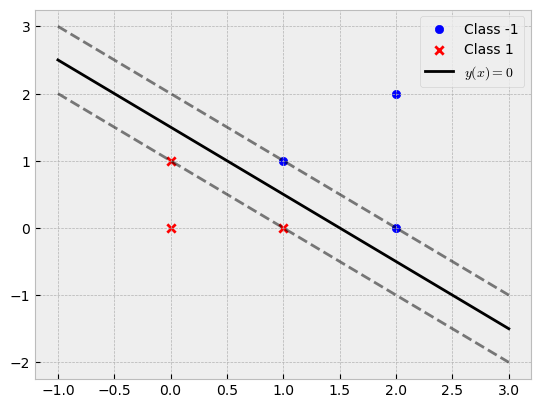

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

X = np.array([[1,1],[2,2],[2,0],[0,0],[1,0],[0,1]])
t = np.array([-1,-1,-1,1,1,1])

xline = np.linspace(-1,3,100)
yline = -xline + 3/2
yline_margin1 = -xline + 2
yline_margin2 = -xline + 1

plt.scatter(X[t==-1,0], X[t==-1,1], c='b', label='Class -1')
plt.scatter(X[t==1,0], X[t==1,1], c='r', marker='x', label='Class 1')
plt.plot(xline, yline, 'k', label='$y(x)=0$')
plt.plot(xline, yline_margin1, '--k', alpha=0.5)
plt.plot(xline, yline_margin2, '--k', alpha=0.5)
plt.legend();

2. (3 points) **What are the support vectors?**

The support vectors are the samples on the margin, that is, the ones with the shortest distance to the discriminant function $y(\mathbf{x})$. In this case, the support vectors are

$$\{x_1, x_3, x_5, x_6\} = \{[1,1]^T, [2,0]^T, [1,0]^T, [0,1]^T\}$$

3. <span style="color:red">Extra Credit (up to 4.5 points)</span> **Construct the solution in the dual space by finding the Lagrange (undetermined) multipliers, $\alpha_i$. Compare your result to that in part 1.**

We seek to maximize the dual Lagrangian

\begin{align*}
\tilde{\mathcal{L}}(\mathbf{a}) = \sum_{n=1}^N a_n - \frac{1}{2}\sum_{n=1}^N\sum_{m=1}^N a_n a_m t_n t_m K(\mathbf{x}_n, \mathbf{x}_m)
\end{align*}

subject to the constraints

$$\sum_{n=1}^N a_nt_n = 0$$

for $a_n \geq 0$, $n=1,2,\dots, N$. Moreover, consider $\phi(\mathbf{x}) = \mathbf{x}$ the linear feature mapping, thus $K(\mathbf{x}_n, \mathbf{x}_m) = \phi(\mathbf{x}_n)^T\phi(\mathbf{x}_m) = \mathbf{x}_n^T \mathbf{x}_m$. Using the constraint, we can substitute 

$$ a_1 + a_2 + a_3 - a_4 - a_5 - a_6 = 0 \iff a_6 = a_1 + a_2 + a_3 - a_4 - a_5$$

in the expression for $\tilde{\mathcal{L}}(\mathbf{a})$. 

Then we can get a system of linear equations by setting the partial derivatives, $\frac{\partial\mathcal{L}}{\partial a_i}$ to zero. This yields:

\begin{align*}
\begin{bmatrix} -1 & -2 & -2 & 0 & 1 \\ 2 & 5 & 2 & 1 & 1 \\ -2 & -2 & -5 & -1 & 1 \\ 0 & -1 & 1 & -1 & -1 \\ 1 & 1 & 3 & -1 & -2 \end{bmatrix} \begin{bmatrix} a_1 \\ a_2 \\ a_3 \\ a_4 \\ a_5 \end{bmatrix} = \begin{bmatrix} -2 \\ 2 \\ -2 \\ 0 \\ 0\end{bmatrix}
\end{align*}

Unfortunately, this is an inconsistent set of equations. Therefore, the maxima must be achieved on the boundary (where some $a_i$ vanish). We try each $a_i = 0$ and solve $\frac{\partial\mathcal{L}}{\partial a_i}=0$:

$$\frac{\partial \mathcal{L}(0, a_2, a_3, a_4, a_5)}{\partial a_i} = 0$$

implies $\mathbf{a} = \frac{1}{5}[0, -2, -2, 8, -8, 4]^T$, which violates the constraint $a_i\geq 0$. Next, both of the following vanishing derivatives, 

$$\frac{\partial \mathcal{L}(a_1, 0, a_3, a_4, a_5)}{\partial a_i} = \frac{\partial \mathcal{L}(a_1, a_2, 0, a_4, a_5)}{\partial a_i} = 0$$

lead to inconsistent equations. Then the derivative

$$\frac{\partial \mathcal{L}(a_1, a_2, a_3, 0, a_5)}{\partial a_i}=0$$

implies $\mathcal{a}=\frac{1}{5}[2,2,2,0,0,6]^T$, which does not violate the constraint $a_i\geq 0$. In this case, the objective function is $\tilde{\mathcal{L}}(\mathbf{a})=4$. Finally, we have

$$\frac{\partial \mathcal{L}(a_1, a_2, a_3, a_4, 0)}{\partial a_i}=0$$

which implies $\mathcal{a}=\frac{1}{5}[16,0,4,0,14,6]^T$, and the constraint $a_i\geq 0$ is obeyed. In this case, the objective function is $\tilde{\mathcal{L}}(\mathbf{a})=1.2$.

Thus $\mathcal{a}=\frac{1}{5}[2,2,2,0,0,6]^T$ is where the objective function is maximized within the constraints. Now we see the weight vector $\mathbf{w}$, by minimizing $\mathcal{L}(\mathbf{w}, \mathbf{a})$,

$$\mathcal{L}(\mathbf{w}, \mathbf{a}) = \frac{1}{2}\Vert\mathbf{w}\Vert^2 - \sum_{n=1}^N a_n (t_n (\mathbf{w}^T\phi(x_n) +w_0) - 1)$$

with respect to $\mathbf{a}$.

We take the derivative of the primal Lagrangian:

$$\frac{\partial\mathcal{L}}{\partial\mathbf{w}} = \mathbf{w} - \sum_{n=1}^N a_nt_n\phi(x_n) = 0 \Longrightarrow \mathbf{w} = \sum_{n=1}^N a_nt_n\phi(x_n)$$

For the $\mathbf{a}$ found above, the solution is then

$$\mathbf{w} = -\frac{16}{5}x_1 - 0x_2 -\frac{4}{5}x_3 + 0x_4 + \frac{14}{5}x_5 + \frac{6}{5}x_6 = \begin{bmatrix}  -2 \\ -2 \end{bmatrix}$$

To find $w_0$, we can use one of the support vectors. For instance, $x_1 = [1,1]^T$. Since $x_1$ is a support vector, then $t_1(\mathbf{w}^T\phi(x_1) + w_0)=1$, and thus

$$-\begin{bmatrix}-2 & -2\end{bmatrix} \begin{bmatrix} 1 \\ 1 \end{bmatrix} + w_0 = 1 \iff 4 - w_0 = 1 \iff w_0 = 3$$

The full weight vector (including the intercept term) is $\mathbf{w} = [3, -2, -2]^T$.

---

# Exercise 5 (15 points)

**Consider the following dataset**

| x1| x2| t | 
|---|---|---|
| 1 | 0 | 1 |
| 4 | 2 | 1 |
| 0 | -1| -1|
| -1| -1| -1|
| -2| 1 | -1|

**where $t$ is the ground truth target label. Answer the following questions:**

1. (5 points) **Consider the _Fisher's LDA classifier_ and answer the following sub-parts:**
    1. (2.5 points) **Compute the between-class scatter matrix, $S_B$, and the within-class scatter matrix, $S_W$.**
    2. (2.5 points) **Find $w$ and $w_0$. Draw the respective discriminant function.**

Let's compute $S_B$ and $S_W$:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [3]:
# Dataset
X = np.array([[1,0],[4,2],[0,-1],[-1,-1],[-2,1]])
t = np.array([1,1,-1,-1,-1])

# Means
m1=np.mean(X[t==1,:],axis=0).reshape(-1,1)
m2=np.mean(X[t==-1,:],axis=0).reshape(-1,1)

# Between-class scatter matrix
SB=(m1-m2)@(m1-m2).T
print('SB = ', SB)

# Within-class scatter matrix
SW = np.cov(X[t==1,:].T)+np.cov(X[t==-1,:].T)
print('SW = ', SW)

SB =  [[12.25        4.66666667]
 [ 4.66666667  1.77777778]]
SW =  [[5.5        2.        ]
 [2.         3.33333333]]


2. The projection vector, $\mathbf{w}$, is the eigenvector of $S_W^{-1}S_B$ with the largest eigenvalue, and $w_0=-\frac{\mathbf{w}^T (\mathbf{m}_1+\mathbf{m}_2)}{2}$.

In [4]:
# Eigendecomposition
L,E = np.linalg.eigh(np.linalg.inv(SW)@SB)
w = E[:,np.argmax(L)]
w0 = -(m1+m2).T@w/2

print('w0 = ', w0)
print('w = ', w)

w0 =  [0.76196876]
w =  [-0.99929708 -0.03748785]


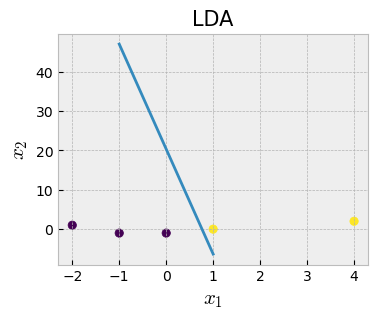

In [5]:
x_line = np.linspace(-1,1,100)
y_line = -(w[0]/w[1])*x_line - w0/w[1]

plt.figure(figsize=(4,3)); plt.scatter(X[:,0], X[:,1],c=t); plt.plot(x_line, y_line)
plt.xlabel('$x_1$',size=15); plt.ylabel('$x_2$',size=15); plt.title('LDA',size=15);

2. (5 points) **Consider the Perceptron classifier with the initial weights $w=[4,1]$ and intercept $w_0=2$. Answer the following sub-parts:**

    1. (2 points) **Draw the samples and the corresponding discriminant function.**
    2. (3 points) **What is the smallest value for the learning rate $\eta$ such that the updated Perceptron will result in zero misclassified points using only one iteration?**

1. The discriminant function can be written as

$$y(\mathbf{x}) = \phi(\mathbf{w}^T\mathbf{x}+w_0) = \phi(4x_1 + x_2 + 2)$$

where $\phi(x)=\begin{cases}1, & x>0 \\ -1, & x\leq 0\end{cases}$ is the threshold function.

We classify as 1 if $y(\mathbf{x})> 0 \iff 4x_1 + x_2 + 2 > 0$, otherwise classify as 0.

we can rewrite the discriminant function as:

$$x_2 = -4x_1 - 2$$

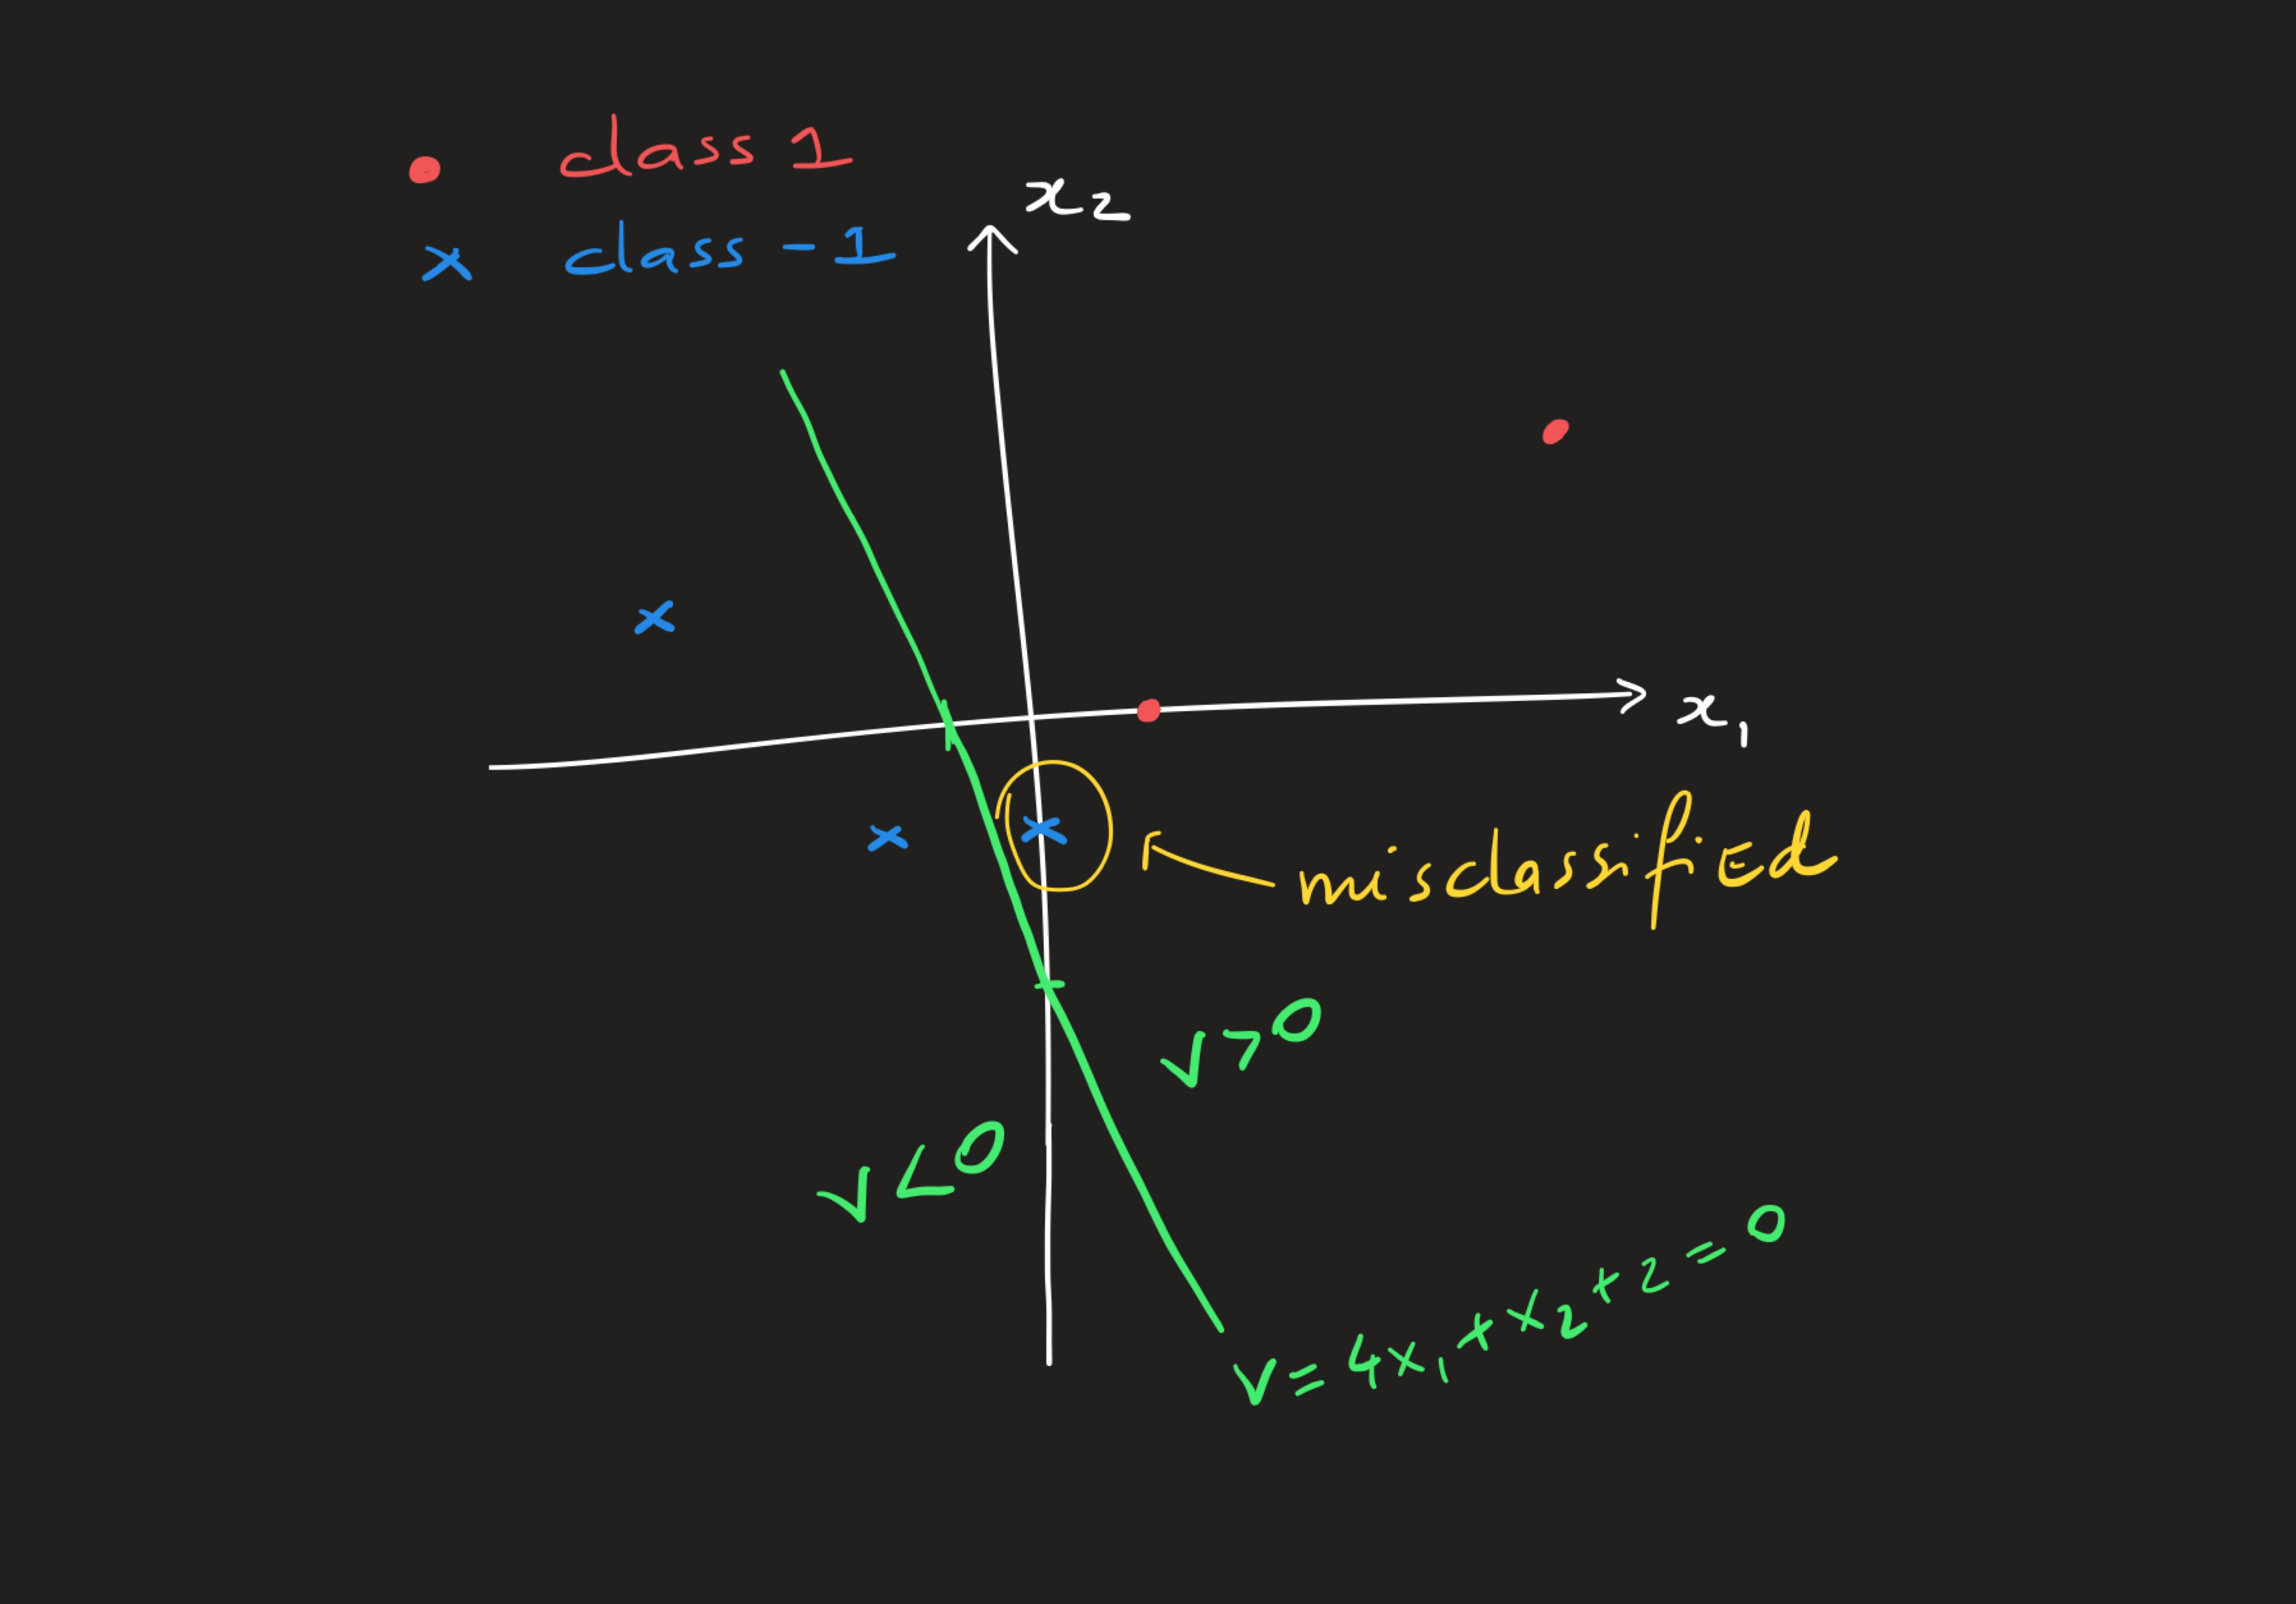

In [6]:
from IPython.display import Image
Image('figures/discriminant_function.jpg',
      width=500)

2. Let's evaluate the output for each of the 5 data samples provided:

| x | y | z | t | 
|---|---|---|---|
| 1 | 0 | 1 | 1 |
| 4 | 2 | 1 | 1 |
| 0 | -1| 1 | -1|
| -1| -1| -1| -1|
| -2| 1 | -1| -1|

As the Perceptron algorithm uses misclassified points to make updates in its parameters (weights and bias), the first step is to identify if there are any misclassified points.

For the table above, we can see that data sample $(x_3,y_3)=(0,-1)$ is misclassified. So this will be the only point that will be used to make the updates for the weights and bias term of the Perceptron.

The update equations are given as:

\begin{align*}
\mathbf{w}^{(t+1)} &= \mathbf{w}^{(t)} + \eta \mathbf{x}_n t_n = \begin{bmatrix}4\\1\end{bmatrix} + \eta \begin{bmatrix}0\\-1\end{bmatrix} (-1) = \begin{bmatrix}4\\1+\eta\end{bmatrix}\\
w_0^{(t+1)} &= w_0^{(t)} + \eta t_n = 2 + \eta (-1) = 2-\eta
\end{align*}

The new equation for the decision surface is:

\begin{align*}
z &= \phi(v), \text{ where } v = 4x + (1+\eta)y + 2 - \eta
\end{align*}

Putting it all together for the misclassified point, we now have:

\begin{align*}
v &= \mathbf{w}^{(t+1)^T}\begin{bmatrix}0\\-1\end{bmatrix} + b^{(t+1)}\\
&= [4, 1+\eta] \begin{bmatrix}0\\-1\end{bmatrix} + 2-\eta\\
&=-1 -\eta + 2 - \eta\\
&= 1 -2\eta
\end{align*}

Now, note that, from the activation function we are using, the point $[0,-1]$ will be classified with label $-1$ if $v\leq 0$, hence:

\begin{align*}
1 -2\eta \leq 0 \iff \eta \geq 0.5
\end{align*}

The smallest value for the learning rate such that the updated network will result in zero misclassified points using only one iteration is $\eta=0.5$. 

Check: 

\begin{align*}
\eta=0.5: z &= \phi(v), \text{ where } v = 4x + 1.5y + 1.5
\end{align*}

| x | y | v | z | t | 
|---|---|---|---|---|
| 1 | 0 |5.5| 1 | 1 |
| 4 | 2 |20.5| 1 | 1 |
| 0 | -1| 0 | -1 | -1|
| -1| -1| -4| -1| -1|
| -2| 1 | -5| -1| -1|

In [7]:
# Dataset
X = np.array([[1,0],[4,2],[0,-1],[-1,-1],[-2,1]])
t = np.array([1,1,-1,-1,-1])

# Initial parameters
w = np.array([[4,1]]).T
w0 = 2

# weighted sum
v = X@w+w0

# prediction
y = -1*np.ones((len(t),1))
y[v>0] = 1
y

array([[ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.]])

In [8]:
eta = 0.1

w = (w.T + eta*t[2]*X[2,:]).T
w0 = w0-eta

# weighted sum
v = X@w+w0

# prediction
y = -1*np.ones((len(t),1))
y[v>0] = 1
y

array([[ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.]])

In [9]:
eta = 0.1

w = (w.T + eta*t[2]*X[2,:]).T
w0 = w0-eta

# weighted sum
v = X@w+w0

# prediction
y = -1*np.ones((len(t),1))
y[v>0] = 1
y

array([[ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.]])

In [10]:
w, w0

(array([[4. ],
        [1.2]]),
 1.7999999999999998)

3. (5 points) **Consider the Logistic Regression classifier with the initial weights $w=[4,1]$ and intercept $w_0=2$. Let a label $t=-1$ be mapped to $t=0$. Answer the following sub-parts:**
    1. (2 points) **Use the initial parameter values to predict the label for each samples above.**
    2. (3 points) **What is the smallest value for the learning rate $\eta$ such that the updated Logistic Regression will result in zero misclassified points using only one iteration?**

1. The discriminant function is of the form

$$y(\mathbf{x}) = \phi(\mathbf{w}^T\mathbf{x} + w_0) = \phi(4 x_1 + x_2 + 2)$$

where $\phi(x)=\frac{1}{1+e^{-x}}$ is the logistic/sigmoid activation function. In the table below, consider $v=\mathbf{w}^T\mathbf{x} + w_0=4 x_1 + x_2 + 2$, thus $y(\mathbf{x}) = \phi(v)$.

| x1| x2| v | y | t | 
|---|---|---|---|---|
| 1 | 0 | 6 |  0.998 | 1 |
| 4 | 2 | 20 | 1 | 1 |
| 0 | -1| 1 |0.731 | 0 |
| -1| -1| -3 | 0.047 | 0 |
| -2| 1 | -5 |0.007 | 0 |

In [11]:
# Dataset
X = np.array([[1,0],[4,2],[0,-1],[-1,-1],[-2,1]])
t = np.array([[1],[1],[0],[0],[0]])

X.shape, t.shape

((5, 2), (5, 1))

In [12]:
# Logistic function
logistic = lambda x: 1/(1+np.exp(-x))

# Initial parameters
w = np.array([[4,1]]).T
w0 = 2

# weighted sum
v = X@w+w0

# Predictionts (probability of assigning to class 1)
prob = logistic(v)

# If prob>=0.5, then classify as 1, otherwise, classify as 0
y = 1*(prob>=0.5)

v, prob, y

(array([[ 6],
        [20],
        [ 1],
        [-3],
        [-5]]),
 array([[0.99752738],
        [1.        ],
        [0.73105858],
        [0.04742587],
        [0.00669285]]),
 array([[1],
        [1],
        [1],
        [0],
        [0]]))

We can see that the sample $[0,-1]$ is misclassified, because logistic regression outputs a probability larger than 0.5, which would assign it to class 1.

2. The update equations are given as:

\begin{align*}
\mathbf{w}^{(t+1)} &= \mathbf{w}^{(t)} + \eta \sum_{i=1}^N (t_i- \phi(v_i))\mathbf{x}_i \\
&= \begin{bmatrix}4\\1\end{bmatrix} + \eta ((1-0.998)\begin{bmatrix}1\\0\end{bmatrix} + (1-1)\begin{bmatrix}4\\2\end{bmatrix} + ...\\
+ &(1-0.731)\begin{bmatrix}0\\-1\end{bmatrix} + (0-0.047)\begin{bmatrix}-1\\-1\end{bmatrix} + (0-0.007)\begin{bmatrix}-2\\1\end{bmatrix})
\end{align*}

and
\begin{align*}
w_0^{(t+1)} &= w_0^{(t)} + \eta \sum_{i=1}^N (t_i- \phi(v_i))\\
&= 2 + \eta \left((1-0.998) + (1-1) + (1-0.731) + (0-0.047) + (0-0.007)\right)
\end{align*}

In [13]:
np.sum(t*np.log(logistic(X@w+w0)) + (1-t)*np.log(1-logistic(X@w+w0)))

-1.371040074779967

In [14]:
(1-t[2])*np.log(1-logistic(X[2,:]@w+w0))

array([-1.31326169])

In [15]:
w.T+0.1*(t[2]-logistic(X[2,:]@w+w0))*X[2,:]

array([[4.        , 1.07310586]])

In [16]:
# Calculations for w
X.T@(t-prob)

array([[0.06328421],
       [0.77179161]])

In [17]:
# Calculations for w0

np.sum(t-prob)

-0.7827046775140681

We find:
\begin{align*}
\mathbf{w}^{(t+1)} &= \begin{bmatrix}4 + 0.06328421\eta \\ 1 + 0.77179161\eta\end{bmatrix}
\end{align*}

and
\begin{align*}
w_0^{(t+1)} & = 2 -0.7827046775140681\eta
\end{align*}

The new equation for the discriminant function is:

\begin{align*}
y(\mathbf{x}) &= \phi(v), \text{ where } v = \begin{bmatrix}4 + 0.06328421\eta \\ 1 + 0.77179161\eta\end{bmatrix}^T\mathbf{x} + 2 - 0.7827046775140681\eta
\end{align*}

Putting it all together for the misclassified point, we now have:

\begin{align*}
v &= \begin{bmatrix}4 + 0.06328421\eta \\ 1 + 0.77179161\eta\end{bmatrix}^T\begin{bmatrix}0\\-1\end{bmatrix} + 2 - 0.7827046775140681\eta\\
&= -1 - 0.77179161\eta + 2 - 0.7827046775140681\eta\\
&= 1 -(0.77179161 + 0.7827046775140681)\eta\\
&= 1 - 1.554496287514068\eta
\end{align*}

In [18]:
0.77179161+0.7827046775140681

1.554496287514068

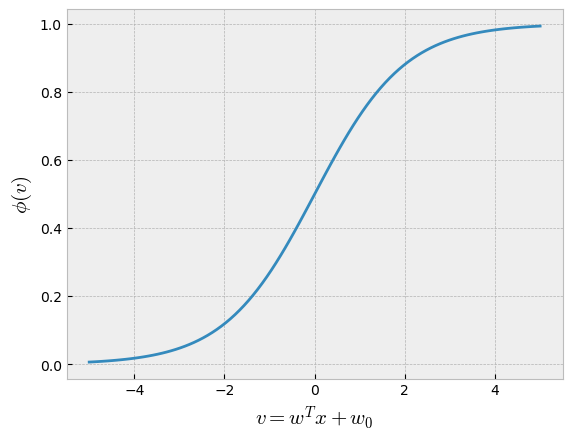

In [19]:
xline = np.linspace(-5,5,100)
plt.plot(xline, logistic(xline))
plt.xlabel('$v=w^Tx + w_0$', size=15)
plt.ylabel('$\phi(v)$',size=15);

Now, note that, from the activation function we are using, the point $[0,-1]$ will be classified with label $0$ if $\phi(v)<0.5 \iff v< 0$.

\begin{align*}
1 - 1.554496287514068\eta < 0 \iff \eta > 0.6432951998870245 \Rightarrow \eta = 0.65
\end{align*}

In [20]:
1/1.554496287514068

0.6432951998870245

You can achieve this in the same way, if you consider:

\begin{align*}
\phi(\mathbf{w}^{(t+1)^T}\mathbf{x} + w_0^{(t+1)}) &< 0.5 \\
\mathbf{w}^{(t+1)^T}\mathbf{x} + w_0^{(t+1)} &< \phi^{-1}(0.5) \\
1 - 1.554496287514068\eta &< 0 \\
\eta &> 0.6432951998870245  \\
& \Rightarrow \eta = 0.65
\end{align*}

You can find the inverse of $\phi(x)$ like this:

$$ \frac{1}{1+e^{-x}} = y \iff \frac{1}{y} - 1 = e^{-x} \iff x = -\ln\left(\frac{1}{y} - 1\right) \Longrightarrow \phi^{-1}(x) = -\ln\left(\frac{1}{x} - 1\right) $$

In [21]:
# Inverse logistic
logistic_inv = lambda x: -np.log(1/x - 1)

logistic_inv(0.5)

-0.0

In [22]:
# learning rate
eta = 0.65

In [23]:
# Updating w
new_w = w + eta*X.T@(t-prob)

new_w

array([[4.04113473],
       [1.50166454]])

In [24]:
# Updating w0
new_w0 = 2 + np.sum(t-prob)*eta
new_w0

1.4912419596158557

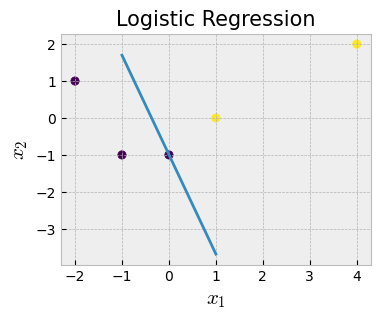

In [25]:
x_line = np.linspace(-1,1,100)
y_line = -x_line*new_w[0]/new_w[1] - new_w0/new_w[1]

plt.figure(figsize=(4,3)); plt.scatter(X[:,0], X[:,1],c=t); plt.plot(x_line, y_line)
plt.xlabel('$x_1$',size=15); plt.ylabel('$x_2$',size=15); plt.title('Logistic Regression',size=15);

In [26]:
# Check

# weighted sum
v_new = X@new_w+new_w0

# Predictionts (probability of assigning to class 1)
prob = logistic(v_new)

# If prob>=0.5, then classify as 1, otherwise, classify as 0
y = 1*(prob>=0.5)
y

array([[1],
       [1],
       [0],
       [0],
       [0]])

Note that this is the **smallest** learning rate need to correctly classify all sample, but it will not maximize the cross-entropy.

---

# On-Time (5 points)

Submit your assignment before the deadline.

___

# Submit Your Solution

Confirm that you've successfully completed the assignment.

Along with the Notebook, include a PDF of the notebook with your solutions.

```add``` and ```commit``` the final version of your work, and ```push``` your code to your GitHub repository.

Submit the URL of your GitHub Repository as your assignment submission on Canvas.

___